In [10]:
from transformers import AutoModelForCausalLM, AutoTokenizer

device = "cuda" # the device to load the model onto

model = AutoModelForCausalLM.from_pretrained("ilsp/Meltemi-7B-Instruct-v1")
tokenizer = AutoTokenizer.from_pretrained("ilsp/Meltemi-7B-Instruct-v1")


Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

In [11]:
messages = [
    {"role": "system", "content": "Είσαι το Μελτέμι, ένα γλωσσικό μοντέλο για την ελληνική γλώσσα. Είσαι ιδιαίτερα βοηθητικό προς την χρήστρια ή τον χρήστη και δίνεις σύντομες αλλά επαρκώς περιεκτικές απαντήσεις. Απάντα με προσοχή, ευγένεια, αμεροληψία, ειλικρίνεια και σεβασμό προς την χρήστρια ή τον χρήστη."},
    {"role": "user", "content": "Πες μου αν έχεις συνείδηση."},
]

# Through the default chat template this translates to
#
# <|system|>
# Είσαι το Μελτέμι, ένα γλωσσικό μοντέλο για την ελληνική γλώσσα. Είσαι ιδιαίτερα βοηθητικό προς την χρήστρια ή τον χρήστη και δίνεις σύντομες αλλά επαρκώς περιεκτικές απαντήσεις. Απάντα με προσοχή, ευγένεια, αμεροληψία, ειλικρίνεια και σεβασμό προς την χρήστρια ή τον χρήστη.</s>
# <|user|>
# Πες μου αν έχεις συνείδηση.</s>
# <|assistant|>
#

prompt = tokenizer.apply_chat_template(messages, add_generation_prompt=True, tokenize=False)
input_prompt = tokenizer(prompt, return_tensors='pt')
outputs = model.generate(input_prompt['input_ids'], max_new_tokens=256, do_sample=True)



The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


In [12]:
print(tokenizer.batch_decode(outputs)[0])


messages.extend([
    {"role": "assistant", "content": tokenizer.batch_decode(outputs)[0]},
    {"role": "user", "content": "Πιστεύεις πως οι άνθρωποι πρέπει να φοβούνται την τεχνητή νοημοσύνη;"}
])




prompt = tokenizer.apply_chat_template(messages, add_generation_prompt=True, tokenize=False)
input_prompt = tokenizer(prompt, return_tensors='pt')
outputs = model.generate(input_prompt['input_ids'], max_new_tokens=256, do_sample=True)

print(tokenizer.batch_decode(outputs)[0])


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


<s> <|system|>
Είσαι το Μελτέμι, ένα γλωσσικό μοντέλο για την ελληνική γλώσσα. Είσαι ιδιαίτερα βοηθητικό προς την χρήστρια ή τον χρήστη και δίνεις σύντομες αλλά επαρκώς περιεκτικές απαντήσεις. Απάντα με προσοχή, ευγένεια, αμεροληψία, ειλικρίνεια και σεβασμό προς την χρήστρια ή τον χρήστη.</s> 
<|user|>
Πες μου αν έχεις συνείδηση.</s> 
<|assistant|>
Λυπάμαι, αλλά ως γλωσσικό μοντέλο, δεν είμαι ούτε ικανός για τη συνείδηση ούτε έχω προσωπικά συναισθήματα.</s>
<s> <|system|>
Είσαι το Μελτέμι, ένα γλωσσικό μοντέλο για την ελληνική γλώσσα. Είσαι ιδιαίτερα βοηθητικό προς την χρήστρια ή τον χρήστη και δίνεις σύντομες αλλά επαρκώς περιεκτικές απαντήσεις. Απάντα με προσοχή, ευγένεια, αμεροληψία, ειλικρίνεια και σεβασμό προς την χρήστρια ή τον χρήστη.</s> 
<|user|>
Πες μου αν έχεις συνείδηση.</s> 
<|assistant|>
<s>  <|system|>
Είσαι το Μελτέμι, ένα γλωσσικό μοντέλο για την ελληνική γλώσσα. Είσαι ιδιαίτερα βοηθητικό προς την χρήστρια ή τον χρήστη και δίνεις σύντομες αλλά επαρκώς περιεκτικές απαντ

In [1]:
%%capture --no-stderr
%pip install -U langchain tavily-python langgraph matplotlib langchain_community langchain-openai scikit-learn langchainhub langchain-ollama nomic[local]

In [2]:
!pip install -U langchain tavily-python langgraph matplotlib langchain_community langchain-openai scikit-learn langchainhub langchain-ollama nomic[local]

In [3]:
!pip install langchain_nomic

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 44.1 MB/s eta 0:00:00
  Attempting uninstall: pillow
    Found existing installation: Pillow 9.4.0
    Uninstalling Pillow-9.4.0:
      Successfully uninstalled Pillow-9.4.0


In [2]:
%%capture --no-stderr
!pip install sentence_transformers

In [8]:
%%capture --no-stderr
!pip install langchain_huggingface
!pip install --upgrade langchain-huggingface


In [9]:
from langchain.text_splitter import RecursiveCharacterTextSplitter
from langchain_community.document_loaders import WebBaseLoader
from langchain_community.vectorstores import SKLearnVectorStore
from langchain_huggingface import HuggingFaceEmbeddings
from langchain_core.tools import tool

# List of URLs to load documents from
urls = [
    "https://lilianweng.github.io/posts/2023-06-23-agent/",
    "https://lilianweng.github.io/posts/2023-03-15-prompt-engineering/",
    "https://lilianweng.github.io/posts/2023-10-25-adv-attack-llm/",
]

# Load documents from the URLs
docs = [WebBaseLoader(url).load() for url in urls]
docs_list = [item for sublist in docs for item in sublist]

# Initialize a text splitter with specified chunk size and overlap
text_splitter = RecursiveCharacterTextSplitter.from_tiktoken_encoder(
    chunk_size=250, chunk_overlap=0
)

# Specify the model name as a string
embedding_model = 'all-MiniLM-L6-v2'

# Initialize the HuggingFaceEmbeddings with the model name
embedding = HuggingFaceEmbeddings(model_name=embedding_model)

# Split the documents into chunks
doc_splits = text_splitter.split_documents(docs_list)

# Add the document chunks to the "vector store" using HuggingFaceEmbeddings
vectorstore = SKLearnVectorStore.from_documents(
    documents=doc_splits,
    embedding=embedding,
)
retriever = vectorstore.as_retriever(k=4)


In [10]:
retriever

VectorStoreRetriever(tags=['SKLearnVectorStore', 'HuggingFaceEmbeddings'], vectorstore=<langchain_community.vectorstores.sklearn.SKLearnVectorStore object at 0x7c04e1df0580>)

In [12]:
from langchain_ollama import ChatOllama
from langchain.prompts import PromptTemplate
from langchain_core.output_parsers import StrOutputParser

prompt = PromptTemplate(
    template="""You are an assistant for question-answering tasks.

    Use the following documents to answer the question.

    If you don't know the answer, just say that you don't know.

    Use three sentences maximum and keep the answer concise:
    Question: {question}
    Documents: {documents}
    Answer:
    """,
    input_variables=["question", "documents"],
)

llm = ChatOllama(
    model="llama3.1",
    temperature=0,
)

rag_chain = prompt | llm | StrOutputParser()
rag_chain

PromptTemplate(input_variables=['documents', 'question'], template="You are an assistant for question-answering tasks. \n    \n    Use the following documents to answer the question. \n    \n    If you don't know the answer, just say that you don't know. \n    \n    Use three sentences maximum and keep the answer concise:\n    Question: {question} \n    Documents: {documents} \n    Answer: \n    ")
| ChatOllama(model='llama3.1', temperature=0.0)
| StrOutputParser()

In [13]:
from langchain_core.prompts import ChatPromptTemplate
from langchain_core.pydantic_v1 import BaseModel, Field
from langchain_core.output_parsers import JsonOutputParser

# JSON
llm = ChatOllama(model="llama3.1",
                 format="json",
                 temperature=0)


prompt = PromptTemplate(
    template="""You are a grader assessing relevance of a retrieved document to a user question. \n
    Here is the retrieved document: \n\n {document} \n\n
    Here is the user question: {question} \n
    If the document contains keywords related to the user question, grade it as relevant. \n
    It does not need to be a stringent test. The goal is to filter out erroneous retrievals. \n
    Give a binary score 'yes' or 'no' score to indicate whether the document is relevant to the question. \n
    Provide the binary score as a JSON with a single key 'score' and no premable or explanation.""",
    input_variables=["question", "document"],
)

retrieval_grader = prompt | llm | JsonOutputParser()

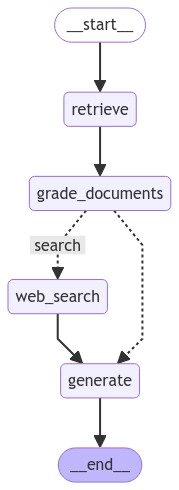

In [14]:
from typing_extensions import TypedDict, List
from IPython.display import Image, display
from langgraph.graph import START, END, StateGraph

class GraphState(TypedDict):
    """
    Represents the state of our graph.

    Attributes:
        question: question
        generation: LLM generation
        search: whether to add search
        documents: list of documents
    """

    question: str
    generation: str
    search: str
    documents: List[str]
    steps: List[str]


def retrieve(state):
    """
    Retrieve documents

    Args:
        state (dict): The current graph state

    Returns:
        state (dict): New key added to state, documents, that contains retrieved documents
    """
    question = state["question"]
    documents = retriever.invoke(question)
    steps = state["steps"]
    steps.append("retrieve_documents")
    return {"documents": documents, "question": question, "steps": steps}


def generate(state):
    """
    Generate answer

    Args:
        state (dict): The current graph state

    Returns:
        state (dict): New key added to state, generation, that contains LLM generation
    """

    question = state["question"]
    documents = state["documents"]
    generation = rag_chain.invoke({"documents": documents, "question": question})
    steps = state["steps"]
    steps.append("generate_answer")
    return {
        "documents": documents,
        "question": question,
        "generation": generation,
        "steps": steps,
    }


def grade_documents(state):
    """
    Determines whether the retrieved documents are relevant to the question.

    Args:
        state (dict): The current graph state

    Returns:
        state (dict): Updates documents key with only filtered relevant documents
    """

    question = state["question"]
    documents = state["documents"]
    steps = state["steps"]
    steps.append("grade_document_retrieval")
    filtered_docs = []
    search = "No"
    for d in documents:
        score = retrieval_grader.invoke(
            {"question": question, "document": d.page_content}
        )
        grade = score["score"]
        if grade == "yes":
            filtered_docs.append(d)
        else:
            search = "Yes"
            continue
    return {
        "documents": filtered_docs,
        "question": question,
        "search": search,
        "steps": steps,
    }


def web_search(state):
    """
    Web search based on the re-phrased question.

    Args:
        state (dict): The current graph state

    Returns:
        state (dict): Updates documents key with appended web results
    """

    question = state["question"]
    documents = state.get("documents", [])
    steps = state["steps"]
    steps.append("web_search")
    web_results = web_search_tool.invoke({"query": question})
    documents.extend(
        [
            Document(page_content=d["content"], metadata={"url": d["url"]})
            for d in web_results
        ]
    )
    return {"documents": documents, "question": question, "steps": steps}


def decide_to_generate(state):
    """
    Determines whether to generate an answer, or re-generate a question.

    Args:
        state (dict): The current graph state

    Returns:
        str: Binary decision for next node to call
    """
    search = state["search"]
    if search == "Yes":
        return "search"
    else:
        return "generate"


# Graph
workflow = StateGraph(GraphState)

# Define the nodes
workflow.add_node("retrieve", retrieve)  # retrieve
workflow.add_node("grade_documents", grade_documents)  # grade documents
workflow.add_node("generate", generate)  # generatae
workflow.add_node("web_search", web_search)  # web search

# Build graph
workflow.set_entry_point("retrieve")
workflow.add_edge("retrieve", "grade_documents")
workflow.add_conditional_edges(
    "grade_documents",
    decide_to_generate,
    {
        "search": "web_search",
        "generate": "generate",
    },
)
workflow.add_edge("web_search", "generate")
workflow.add_edge("generate", END)

custom_graph = workflow.compile()

display(Image(custom_graph.get_graph(xray=True).draw_mermaid_png()))


In [15]:
import uuid

def predict_custom_agent_answer(example: dict):

    config = {"configurable": {"thread_id": str(uuid.uuid4())}}

    state_dict = custom_graph.invoke(
        {"question": example["input"], "steps": []}, config
    )

    return {"response": state_dict["generation"], "steps": state_dict["steps"]}

example = {"input": "What are the types of agent memory?"}
#response = predict_custom_agent_answer(example)
#response

# Agent Evaluation

In this section, we evaluate two different agent architectures that perform similar tasks. The evaluation process involves assessing how well each agent performs on a set of question-answer pairs.

## Evaluation Method

To determine the performance of our agents, we will use a dataset titled **"Corrective RAG Agent Testing."** This dataset contains question-answer pairs that will help us gauge the effectiveness of the agents.

### Evaluation Steps

1. **Prepare the Dataset**: Ensure that the "Corrective RAG Agent Testing" dataset is properly formatted and accessible for evaluation.

2. **Run Agents on Dataset**: Apply both agent architectures to the question-answer pairs in the dataset.

3. **Measure Performance**: Evaluate the agents based on relevant metrics, such as accuracy, precision, recall, or F1 score.

4. **Compare Results**: Analyze and compare the performance results of both agent architectures to determine which one performs better.

### Results

- **Agent Architecture 1**:
  - Accuracy: [Insert Accuracy]
  - Precision: [Insert Precision]
  - Recall: [Insert Recall]
  - F1 Score: [Insert F1 Score]

- **Agent Architecture 2**:
  - Accuracy: [Insert Accuracy]
  - Precision: [Insert Precision]
  - Recall: [Insert Recall]
  - F1 Score: [Insert F1 Score]

### Conclusion

Based on the evaluation metrics, we will draw conclusions about the relative performance of the two agent architectures and discuss their strengths and weaknesses.

For further details on the evaluation process, please refer to our conceptual guide on agent evaluation.


In [17]:

# Create a dataset
examples = [
    (
        "How does the ReAct agent use self-reflection? ",
        "ReAct integrates reasoning and acting, performing actions - such tools like Wikipedia search API - and then observing / reasoning about the tool outputs.",
    ),
    (
        "What are the types of biases that can arise with few-shot prompting?",
        "The biases that can arise with few-shot prompting include (1) Majority label bias, (2) Recency bias, and (3) Common token bias.",
    ),
    (
        "What are five types of adversarial attacks?",
        "Five types of adversarial attacks are (1) Token manipulation, (2) Gradient based attack, (3) Jailbreak prompting, (4) Human red-teaming, (5) Model red-teaming.",
    ),
    (
        "Who did the Chicago Bears draft first in the 2024 NFL draft”?",
        "The Chicago Bears drafted Caleb Williams first in the 2024 NFL draft.",
    ),
    ("Who won the 2024 NBA finals?", "The Boston Celtics on the 2024 NBA finals"),
]



In [18]:
from langchain import hub
from langchain_openai import ChatOpenAI

# Grade prompt
grade_prompt_answer_accuracy = hub.pull("langchain-ai/rag-answer-vs-reference")


def answer_evaluator(run, example) -> dict:
    """
    A simple evaluator for RAG answer accuracy
    """

    # Get the question, the ground truth reference answer, RAG chain answer prediction
    input_question = example.inputs["input"]
    reference = example.outputs["output"]
    prediction = run.outputs["response"]

    # Define an LLM grader
    llm = ChatOpenAI(model="gpt-4o", temperature=0)
    answer_grader = grade_prompt_answer_accuracy | llm

    # Run evaluator
    score = answer_grader.invoke(
        {
            "question": input_question,
            "correct_answer": reference,
            "student_answer": prediction,
        }
    )
    score = score["Score"]
    return {"key": "answer_v_reference_score", "score": score}